In [1]:
#!pip install tabulate
from coin_game_env import CoinGameEnv
from expectimax_agent import ExpectimaxAgent
from random_agent import RandomAgent
from play import play_vs_other_agent
from UONI import UONI

In [2]:
env = CoinGameEnv(grid_size=5)
#input_agent = InputAgent()
expectimax_agent = ExpectimaxAgent(player=1, max_depth=3)
random_agent = RandomAgent(player=2)

In [3]:
#imports para plotear
import matplotlib.pyplot as plt
from tqdm import tqdm

Input Agents

In [55]:
#play_vs_other_agent(env, agent1=input_agent, agent2=input_agent, render=True)

Random Agents

In [56]:
play_vs_other_agent(env, agent1=RandomAgent(1), agent2=RandomAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     |     | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   |     | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

1

Random Agent vs UONI (Universal Optimization Neural Interface)

In [3]:

# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["UONI", "OTHER"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [00:00<00:00, 76.68it/s]


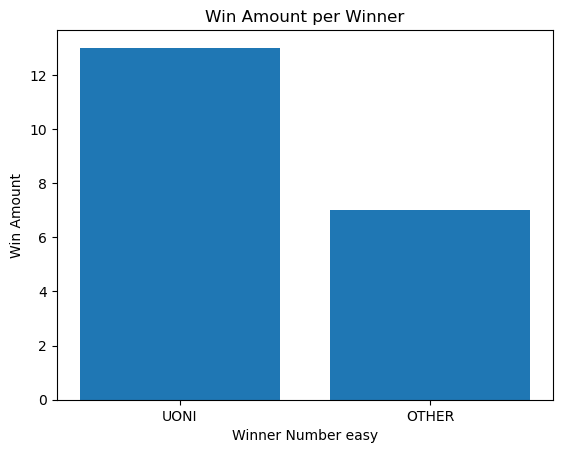

100%|██████████| 20/20 [00:00<00:00, 21.04it/s]


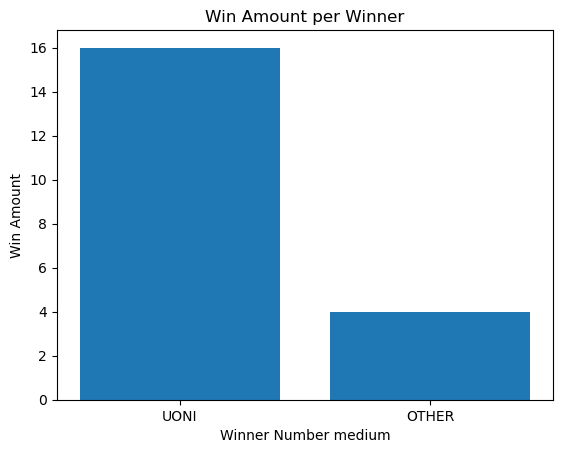

100%|██████████| 20/20 [00:01<00:00, 19.62it/s]


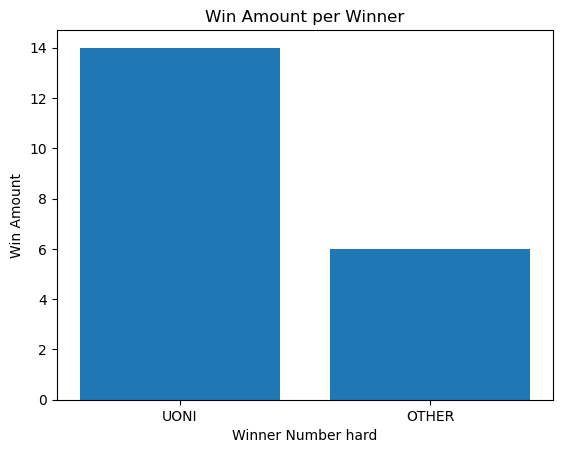

In [4]:
#este juega 20 partidas (UONI contra random)

ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=RandomAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=RandomAgent(1), agent2=UONI(2, level), render=False))
    print_graph(ws[level], level)

In [59]:
winner = play_vs_other_agent(env, agent1=expectiminimax_agent, agent2=random_agent, render=True)
print(f"Winner: Player {winner}")

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   |     | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

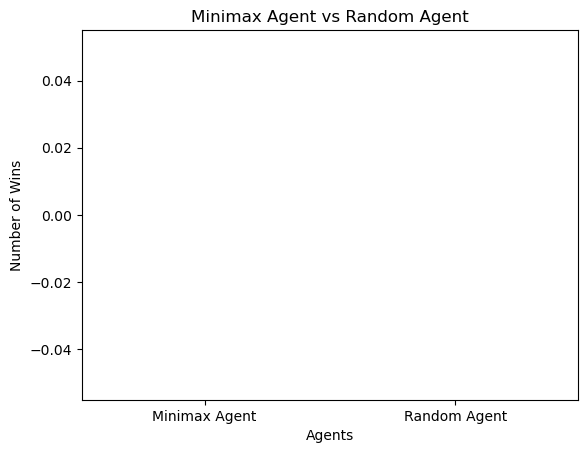

100%|██████████| 100/100 [07:26<00:00,  4.47s/it]


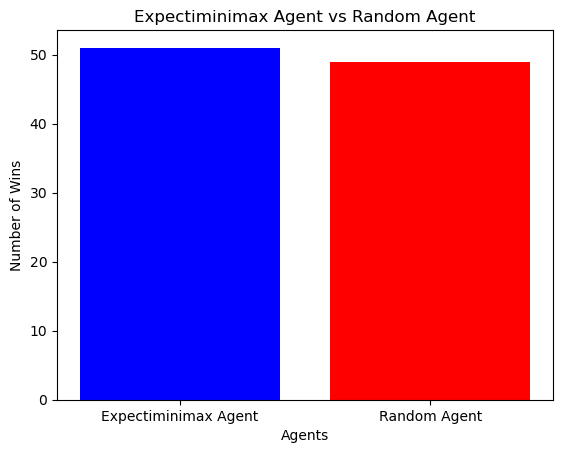

100%|██████████| 20/20 [00:53<00:00,  2.70s/it]


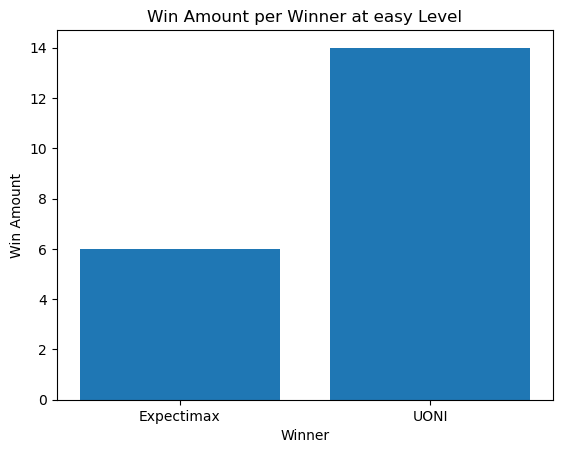

100%|██████████| 20/20 [00:37<00:00,  1.85s/it]


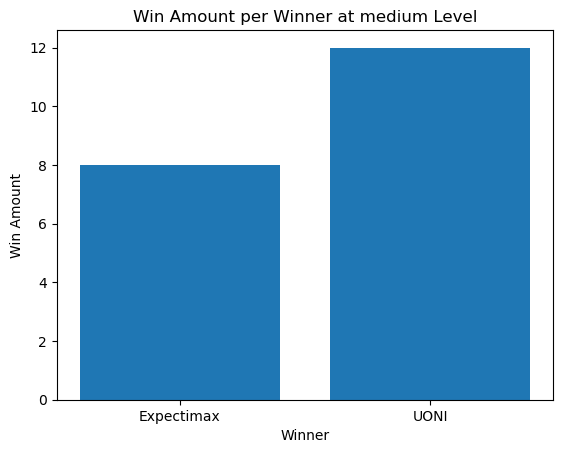

100%|██████████| 20/20 [00:52<00:00,  2.64s/it]


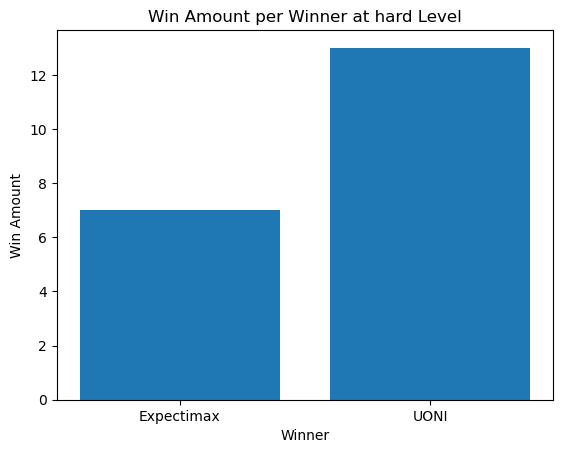

In [4]:
def print_graph(ws, level):
    winners = ["Expectimax", "UONI"]
    win_counts = [ws.count(x) for x in [1, 2]]
    
    plt.bar(winners, win_counts)
    plt.xlabel('Winner')
    plt.ylabel('Win Amount')
    plt.title(f'Win Amount per Winner at {level} Level')
    plt.show()

ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i % 2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=expectimax_agent, agent2=UONI(2, level), render=False))
        else:
            ws[level].append(3 - play_vs_other_agent(env, agent1=UONI(1, level), agent2=expectimax_agent, render=False))
    print_graph(ws[level], level)